# DATA WRANGLING.

### Importing The Necessary Packages

The required packages for this project are pandas for data processing, NumPy for working with arrays, seaborn and matplotlib for data visualizations, and scikit-learn for building and evaluating the Machine Learning models.


In [1]:
import pandas as pd
import seaborn as sns
import os
from math import log
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from termcolor import colored as cl # text customization
import seaborn as sb # visualization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

plt.rcParams['figure.figsize'] = (20, 10) # plot size

sns.set(style='ticks')
sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

### Importing The Data

The "Retail Store Sales Transactions (Scanner Data)" dataset from Kaggle will be used for this project. The dataset shows details of consumer goods sales obtained by ‘scanning’ the bar codes of individual products at electronic points of sale in a retail store. It contains eight features and detailed information about quantities, characteristics, values and prices of goods sold. Using the ‘read_csv’ function provided by the Pandas package, the data will be imported into this notebook. 

In [2]:
scanner_data = pd.read_csv('scanner_data.csv')

In [3]:
scanner_data.shape

(131706, 8)

In [4]:
scanner_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [5]:
scanner_data.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [6]:
scanner_data.columns

Index(['Unnamed: 0', 'Date', 'Customer_ID', 'Transaction_ID', 'SKU_Category',
       'SKU', 'Quantity', 'Sales_Amount'],
      dtype='object')

*Changing "Unnamed:0" column to "Row_ID".*

In [7]:
scanner_data = scanner_data.rename(columns={'Unnamed: 0':'Row_ID'})

In [8]:
scanner_data.head()

,Row_ID,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [9]:
scanner_data.dtypes

Row_ID              int64
Date               object
Customer_ID         int64
Transaction_ID      int64
SKU_Category       object
SKU                object
Quantity          float64
Sales_Amount      float64
dtype: object

In [10]:
duplicates = scanner_data.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
131701    False
131702    False
131703    False
131704    False
131705    False
Length: 131706, dtype: bool


To get a statistical view of the data, the "describe" function will be used.

In [11]:
scanner_data.describe()

,Row_ID,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


*Checking for the top product categories sold.*

In [12]:
scanner_data['SKU_Category'].value_counts().head()

N8U    10913
R6E     5099
LPF     5062
P42     4836
U5F     4570
Name: SKU_Category, dtype: int64

*Checking for the top products sold.*

In [13]:
scanner_data['SKU'].value_counts().head()

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
Name: SKU, dtype: int64

*Checking for the top patronizing customers.*

In [14]:
scanner_data['Customer_ID'].value_counts().head()

1660     228
1665     222
17104    218
1685     191
16905    179
Name: Customer_ID, dtype: int64

In [15]:
scanner_data['Transaction_ID'].value_counts().head()

19098    21
1348     21
42295    20
34320    19
39032    19
Name: Transaction_ID, dtype: int64

Checking the total amount sold for the year

In [16]:
scanner_data['Sales_Amount'].sum()

1578038.6199999999

In [17]:
category_price_means = scanner_data.groupby('SKU_Category')[['Sales_Amount']].mean()
category_price_means.head()

,Sales_Amount
SKU_Category,
01F,17.622739
06Z,41.240048
0H2,6.638920
0KX,4.444457
0WT,6.021530


In [18]:
unit_price_means = scanner_data.groupby('SKU')[['Sales_Amount']].mean()
unit_price_means.head()

,Sales_Amount
SKU,
00GVC,17.680000
00OK1,1.527333
0121I,2.240714
01IEO,7.052632
01IQT,1.317143


In [19]:
unit_price_means = scanner_data.groupby('SKU')[['Sales_Amount']].count()
unit_price_means.head()

,Sales_Amount
SKU,
00GVC,2
00OK1,15
0121I,28
01IEO,38
01IQT,7


In [20]:
scanner_data.describe()

,Row_ID,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


*Checking for relationship between sales amount and quantity.*

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sales_Amount', ylabel='Quantity'>

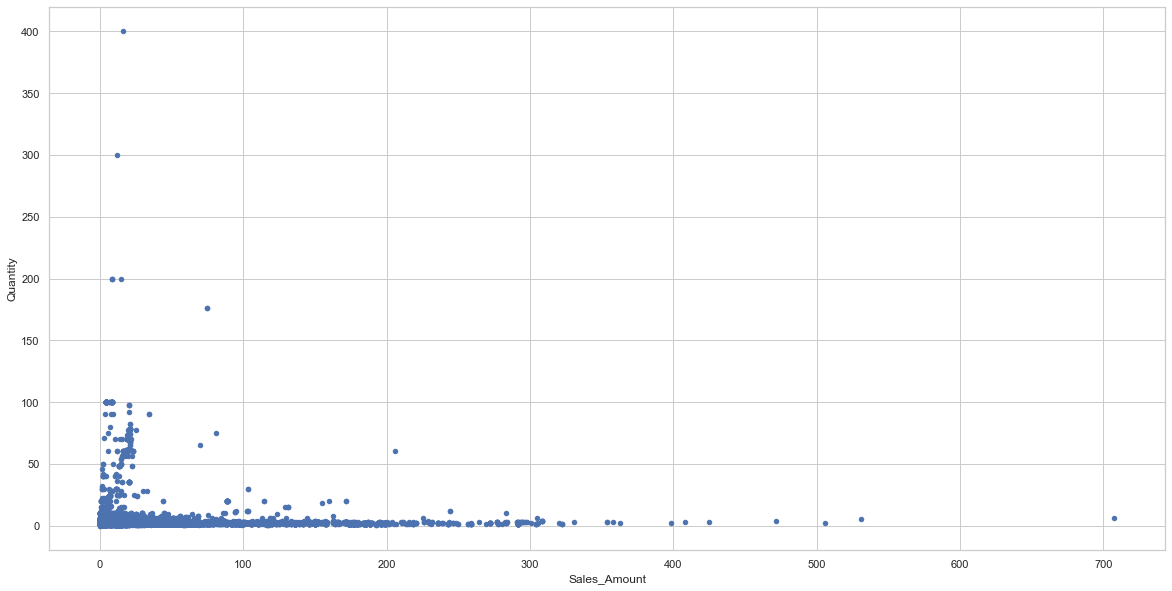

In [21]:
scanner_data.plot(x='Sales_Amount', y='Quantity', kind='scatter')

In [22]:
scanner_data['Sales_Amount'].describe()

count    131706.000000
mean         11.981524
std          19.359699
min           0.020000
25%           4.230000
50%           6.920000
75%          12.330000
max         707.730000
Name: Sales_Amount, dtype: float64

In [23]:
scanner_data['Quantity'].describe()

count    131706.000000
mean          1.485311
std           3.872667
min           0.010000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: Quantity, dtype: float64

*Detecting Outliers.*

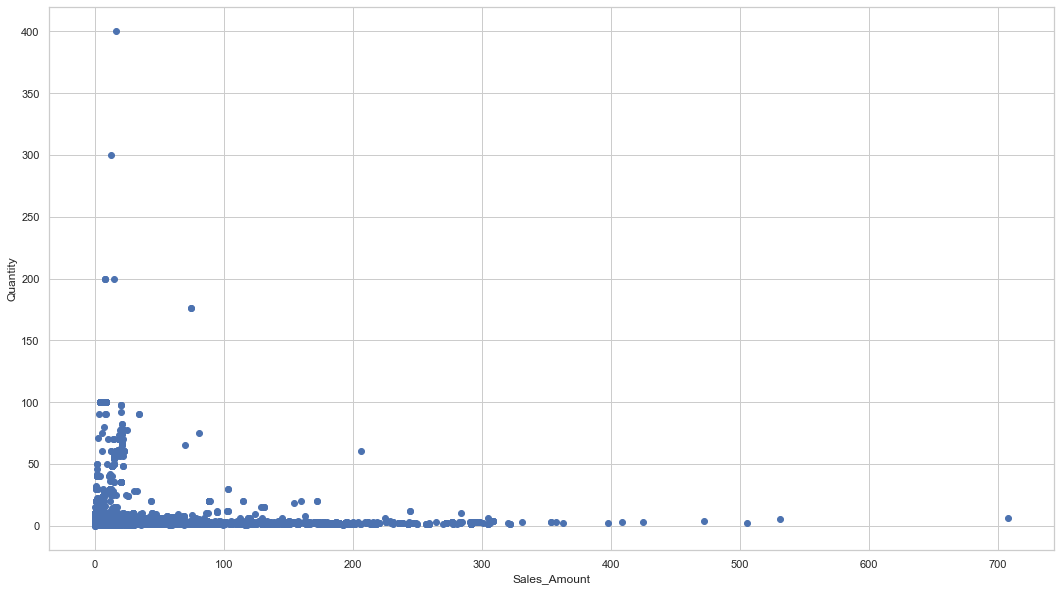

In [24]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(scanner_data['Sales_Amount'], scanner_data['Quantity'])
ax.set_xlabel('Sales_Amount')
ax.set_ylabel('Quantity')
plt.show()

*Checking for the position of the outliers.*


In [25]:
print(np.where(scanner_data['Sales_Amount']>600))

(array([104910]),)


In [26]:
print(np.where(scanner_data['Quantity']>250))

(array([ 77676, 112719]),)


*Replacing outliers with the median value for Sales_Amount.*

In [27]:
median = scanner_data.loc[scanner_data['Sales_Amount']<600, 'Sales_Amount'].median()
scanner_data['Sales_Amount'] = np.where(scanner_data['Sales_Amount'] >600, median,scanner_data['Sales_Amount'])

In [28]:
scanner_data['Sales_Amount'].describe()

count    131706.000000
mean         11.976203
std          19.264546
min           0.020000
25%           4.230000
50%           6.920000
75%          12.330000
max         531.270000
Name: Sales_Amount, dtype: float64

*Replacing outliers with the median value for Quantity.*

In [29]:
median = scanner_data.loc[scanner_data['Quantity']<250, 'Quantity'].median()
scanner_data['Quantity'] = np.where(scanner_data['Quantity'] >250, median,scanner_data['Quantity'])

In [30]:
scanner_data['Quantity'].describe()

count    131706.000000
mean          1.480012
std           3.621478
min           0.010000
25%           1.000000
50%           1.000000
75%           1.000000
max         200.000000
Name: Quantity, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


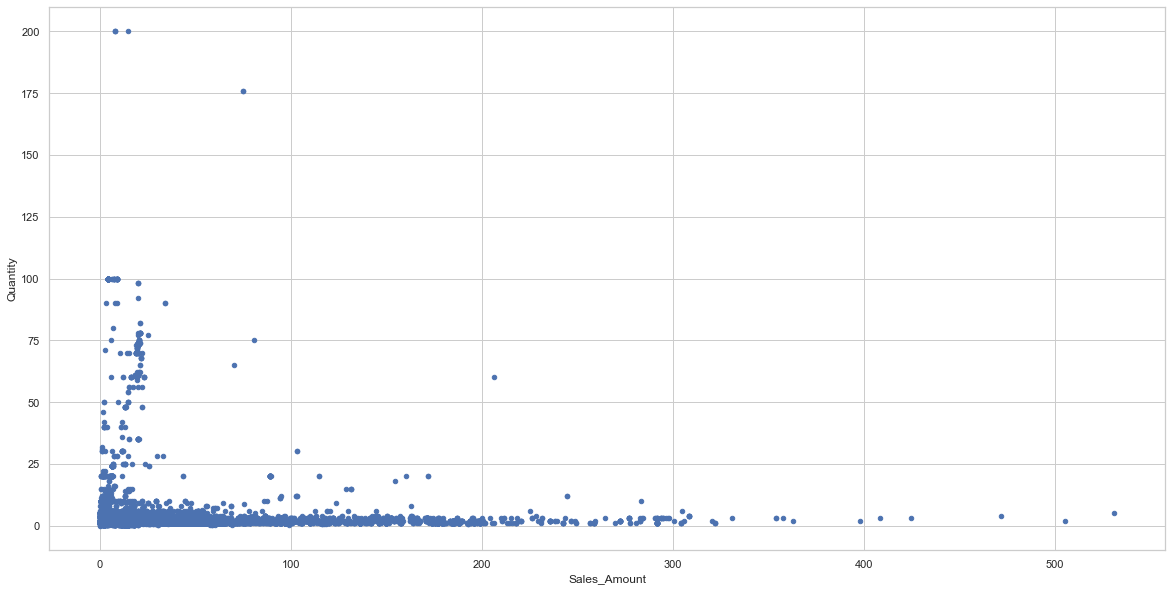

In [31]:
scanner_data.plot(x='Sales_Amount', y='Quantity', kind='scatter');

*OR*

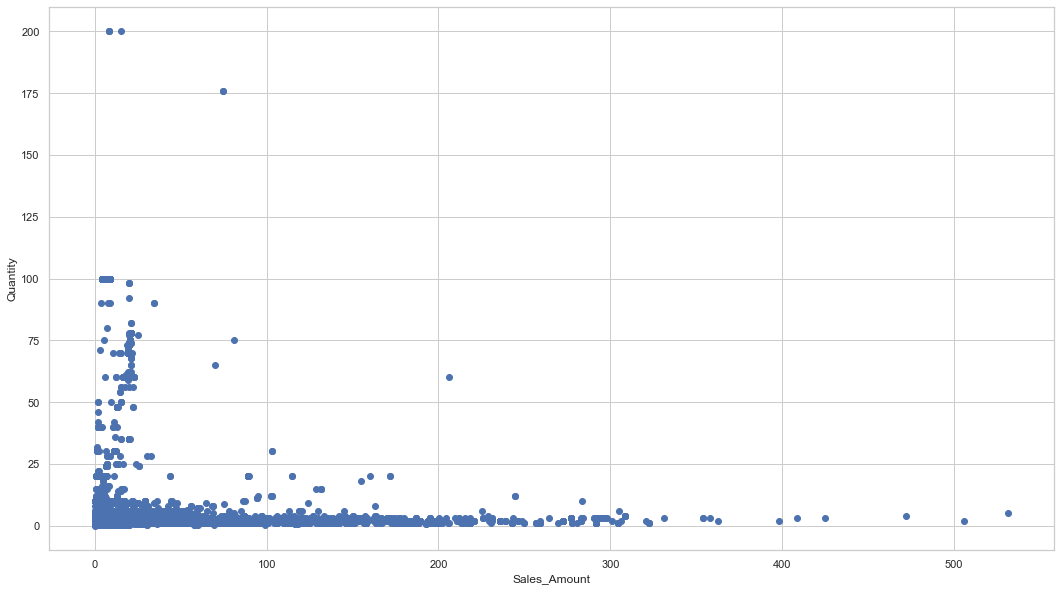

In [32]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(scanner_data['Sales_Amount'], scanner_data['Quantity'])
ax.set_xlabel('Sales_Amount')
ax.set_ylabel('Quantity')
plt.show()

*Taking the logarithm of sales amount.*

In [33]:
b = np.log(scanner_data['Sales_Amount'])

In [34]:
b

0         1.141033
1         1.697449
2         1.848455
3         1.720979
4         1.928619
            ...   
131701    1.865629
131702    1.504077
131703    1.646734
131704    1.519513
131705    2.615935
Name: Sales_Amount, Length: 131706, dtype: float64

In [35]:
b.describe()

count    131706.000000
mean          1.997502
std           0.923559
min          -3.912023
25%           1.442202
50%           1.934416
75%           2.512035
max           6.275270
Name: Sales_Amount, dtype: float64

*Taking the logarithm of quantity sold.*

In [36]:
c = np.log(scanner_data['Quantity'])

In [37]:
c

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
131701    1.098612
131702    0.000000
131703    0.000000
131704    0.000000
131705    0.000000
Name: Quantity, Length: 131706, dtype: float64

In [38]:
c.describe()

count    131706.000000
mean          0.190084
std           0.430120
min          -4.605170
25%           0.000000
50%           0.000000
75%           0.000000
max           5.298317
Name: Quantity, dtype: float64

Text(0, 0.5, 'Quantity')

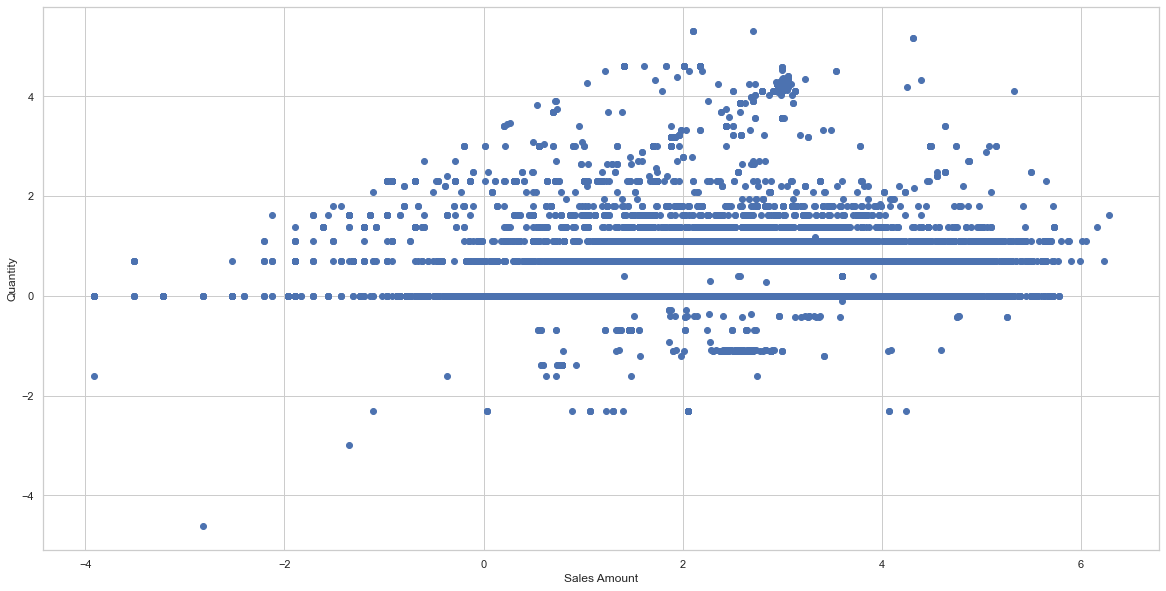

In [39]:
b = np.log(scanner_data['Quantity'])
plt.scatter(np.log(scanner_data['Sales_Amount'].apply(lambda x: float(x))), b)
plt.xlabel('Sales Amount')
plt.ylabel('Quantity')

In [40]:
!pip install pandas-profiling==2.8.0
import pandas_profiling as pp
scanner_data.profile_report()

In [41]:
scanner_data['Sales_Amount'].describe()

count    131706.000000
mean         11.976203
std          19.264546
min           0.020000
25%           4.230000
50%           6.920000
75%          12.330000
max         531.270000
Name: Sales_Amount, dtype: float64

<AxesSubplot:xlabel='Sales_Amount', ylabel='Quantity'>

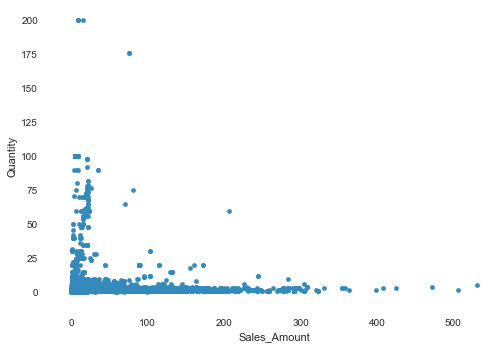

In [42]:
scanner_data.plot(x='Sales_Amount', y='Quantity', kind='scatter')

*Checking for sales summary by date.*

In [43]:
scanner_data.groupby('Date')['Sales_Amount'].sum()

Date
2017-01-02    1929.55
2017-01-03     798.15
2017-01-04    3273.27
2017-01-05    4919.03
2017-01-06    1559.72
               ...   
2017-12-28    3720.79
2017-12-29    3363.16
2017-12-30    3940.49
2017-12-31    4045.15
2018-01-01    1713.20
Name: Sales_Amount, Length: 363, dtype: float64

<AxesSubplot:xlabel='Date'>

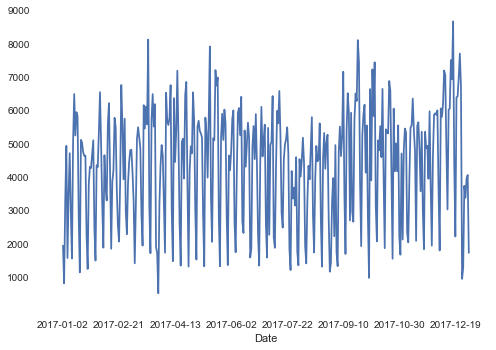

In [44]:
scanner_data.groupby('Date')['Sales_Amount'].sum().plot()

*Checking for sales summary by category.*

In [45]:
scanner_data.groupby('SKU_Category')['Sales_Amount'].sum()

SKU_Category
01F    38029.87
06Z     8619.17
0H2    29875.14
0KX     2044.45
0WT     4052.49
         ...   
Z4O     4925.06
Z99     1969.85
ZJG      754.01
ZX5      954.63
ZYU     1749.91
Name: Sales_Amount, Length: 187, dtype: float64

<AxesSubplot:xlabel='SKU_Category'>

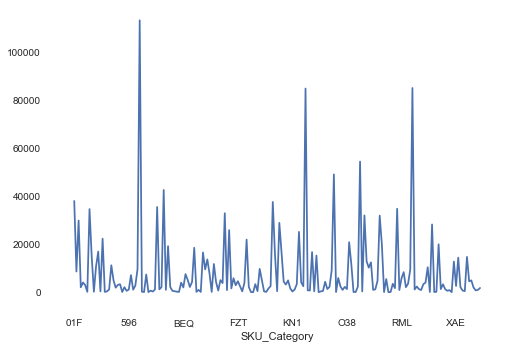

In [46]:
scanner_data.groupby('SKU_Category')['Sales_Amount'].sum().plot()

In [47]:
scanner_data["SKU"].unique()

array(['0EM7L', '68BRQ', 'CZUZX', ..., '4BF3L', 'EQTNO', '9E9GV'],
      dtype=object)

*Method Summary*

I began by importing the necessary packages. I changed the "Unnamed:0" column to "Row_Id", then I checked to see if there are any missing values and what percentages of the columns are missing. If there are missing values, I wanted to order them in increasing order and then present them in a single table.
Fortunately, there are no missing values in the data.
I checked for the product categories with the highest sale, as well as, the products with the highest sale and the highest patronizing customers. The top five categories with the highest sales are N8U, R6E, LPF, P42, U5F with 10913, 5099, 5062, 4836 and 4570 sales respectively. The top five products sold are UNJKW, COWU2, OV1P9, M6J9W, C6TXL with 2007, 791, 737, 698 and 689 sales respectively. The top five patronizing customers are customers with IDs: 1660, 1665, 17104, 1685 and 16905 with 228, 222, 218, 191 and 179 patronages respectively. I calculated the mean of quantity sold and sales price. Then I used a scatter plot to check the relationship between sales amount and quantity. I went ahead to take the logarithms of quantity sold and sales amount before carrying out data profiling to get comprehensive information about the dataset and check for further defects. Also, I checked for sales summaries by date and category.
There are three outliers in the dataset and they were replaced by the median values of their respective columns.

# EXPLORATORY DATA ANALYSIS.

I will begin this process by checking for and removing all the null values in the dataset. This will be done by using the "dropna" command.

The next step will be checking for duplicate values and doing the sales summary by date.

The data types of the variables will also be checked to see if there are any float or object-type variables. This will be done by using the "dtypes" function. If there are any float or object-type variables among the dependent ("Sales_Amount" for price prediction and "Quantity" for quantity prediction) and independent variables("Sales_Amount"/"Quantity" and "SKU"), they will have to be converted into integer types because linear regression, which is among the models that will be used in this project, is supported only on integer-type variables. The conversion will be done by using the "astype" function.

Finally, some data visualizations will be done to see the relationships among the variables.

In [48]:
scanner_data.isnull().sum().sum()

0

Just for further verification, I am checking for any mising values in each column of scanner_data, as well as, the percentages and ordering them in increasing order. Then using pd.concat to present them in a single table with the helpful column names 'count' and '%'.

In [49]:
missing = pd.concat([scanner_data.isnull().sum(axis=1), 100 * scanner_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count', ascending = True)

,count,%
0,0,0.0
87811,0,0.0
87810,0,0.0
87809,0,0.0
87808,0,0.0
...,...,...
43895,0,0.0
43894,0,0.0
43893,0,0.0
43859,0,0.0


The above shows that there are no missing values in the dataset. Hence, I can continue without using the "dropna" command.

Next is checking for duplicate and unique values, and getting the total number of each product sold over the year before going on to check the sales summary by date.



In [50]:
duplicates = scanner_data.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
131701    False
131702    False
131703    False
131704    False
131705    False
Length: 131706, dtype: bool


In [51]:
scanner_data['SKU'].unique() 

array(['0EM7L', '68BRQ', 'CZUZX', ..., '4BF3L', 'EQTNO', '9E9GV'],
      dtype=object)

In [52]:
scanner_data['SKU'].value_counts()

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
         ... 
N864E       1
7VAUA       1
FUFD0       1
W7HKF       1
XMHTE       1
Name: SKU, Length: 5242, dtype: int64

*Checking for sales summary by date*

In [53]:
sales_quant = scanner_data.groupby('Date')['Quantity'].sum()
sales_quant = pd.DataFrame(sales_quant)
sales_quant.head()

,Quantity
Date,
2017-01-02,264.67
2017-01-03,121.00
2017-01-04,530.00
2017-01-05,590.34
2017-01-06,205.50


In [54]:
sales_sum = scanner_data.groupby('Date')['Sales_Amount'].sum()
sales_sum = pd.DataFrame(sales_sum)
sales_sum.head()

,Sales_Amount
Date,
2017-01-02,1929.55
2017-01-03,798.15
2017-01-04,3273.27
2017-01-05,4919.03
2017-01-06,1559.72


In [55]:
sales_count = scanner_data.groupby('Date')['SKU'].count()
sales_count = pd.DataFrame(sales_count)
sales_count.head()

,SKU
Date,
2017-01-02,243
2017-01-03,111
2017-01-04,379
2017-01-05,446
2017-01-06,178


The values of Quantity and SKU above are different because SKU signifies the unique items sold, while Quantity is the total count of items sold including items that are sold more than once.

*Merging sales count and sales sum*

In [56]:
merged_count_sum = sales_count.merge(sales_sum, left_index=True, right_on='Date')
merged_count_sum.head()

,SKU,Sales_Amount
Date,,
2017-01-02,243,1929.55
2017-01-03,111,798.15
2017-01-04,379,3273.27
2017-01-05,446,4919.03
2017-01-06,178,1559.72


In [57]:
print(cl(scanner_data.dtypes, attrs = ['bold']))

Row_ID              int64
Date               object
Customer_ID         int64
Transaction_ID      int64
SKU_Category       object
SKU                object
Quantity          float64
Sales_Amount      float64
dtype: object


In [58]:
print(cl(merged_count_sum.dtypes, attrs = ['bold']))

SKU               int64
Sales_Amount    float64
dtype: object


It can be seen that all the dependent("Sales_Amount" for price prediction and "Quantity" for quantity prediction) and independent variables("Sales_Amount"/"Quantity" and "SKU") except "SKU" are float-type. They will be converted to integer types in the next step.

In [59]:
merged_count_sum['Sales_Amount'] = pd.to_numeric(merged_count_sum['Sales_Amount'], errors = 'coerce')
merged_count_sum['Sales_Amount'] = merged_count_sum['Sales_Amount'].astype('int64')

print(cl(merged_count_sum.dtypes, attrs = ['bold']))

SKU             int64
Sales_Amount    int64
dtype: object


In [60]:
merged_count_sum['Sales_Amount'] = pd.to_numeric(merged_count_sum['Sales_Amount'], errors = 'coerce')
merged_count_sum['Sales_Amount'] = merged_count_sum['Sales_Amount'].astype('int64')

print(cl(merged_count_sum.dtypes, attrs = ['bold']))

SKU             int64
Sales_Amount    int64
dtype: object


Next is visualization. Three different types of charts will be plotted. These include heatmap, scatter plot, and a distribution plot. They will be plotted again much later in the project after some new variables are generated and tables merged.


### Heatmap:
Heatmaps are very useful to find relations between two variables in a dataset. It can be produced using the ‘heatmap’ function of the seaborn package.

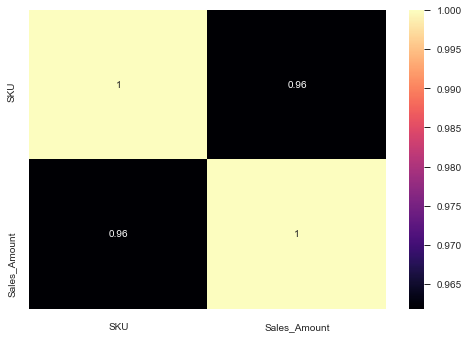

In [61]:
sb.heatmap(merged_count_sum.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

<AxesSubplot:xlabel='Date'>

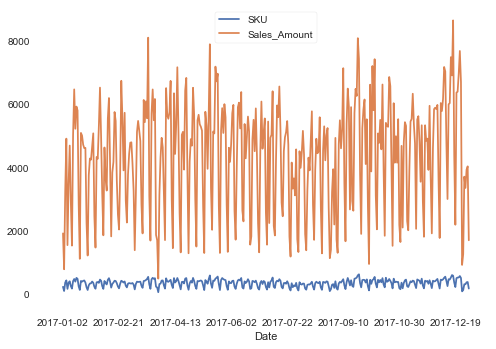

In [62]:
merged_count_sum.plot()

In [63]:
merged_count_sum = merged_count_sum.merge(sales_quant, left_index=True, right_on='Date')
merged_count_sum.head()

,SKU,Sales_Amount,Quantity
Date,,,
2017-01-02,243,1929,264.67
2017-01-03,111,798,121.00
2017-01-04,379,3273,530.00
2017-01-05,446,4919,590.34
2017-01-06,178,1559,205.50


In [64]:
merged_count_sum['Quantity'] = pd.to_numeric(merged_count_sum['Quantity'], errors = 'coerce')
merged_count_sum['Quantity'] = merged_count_sum['Quantity'].astype('int64')

print(cl(merged_count_sum.dtypes, attrs = ['bold']))

SKU             int64
Sales_Amount    int64
Quantity        int64
dtype: object


### Scatter Plot

The scatter plot is used to observe linear relations between two variables in a dataset. The dependent variable is usually marked on the x-axis and the independent variable on the y-axis. For this project, there are two dependent variables "Sales_Amount" and "Quantity" because we are trying to predict two things. Those two variables in the stated order along with "SKU" will be the independent variables in predicting "Sales_Amount" and "Quantity" respectively.

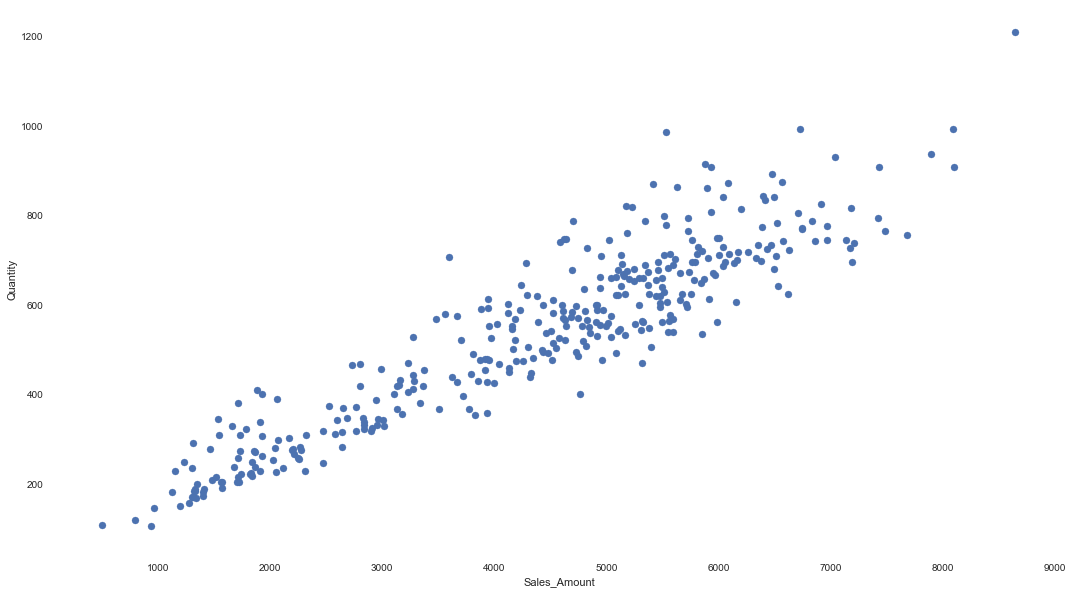

In [65]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(merged_count_sum['Sales_Amount'], merged_count_sum['Quantity'])
ax.set_xlabel('Sales_Amount')
ax.set_ylabel('Quantity')
plt.show()

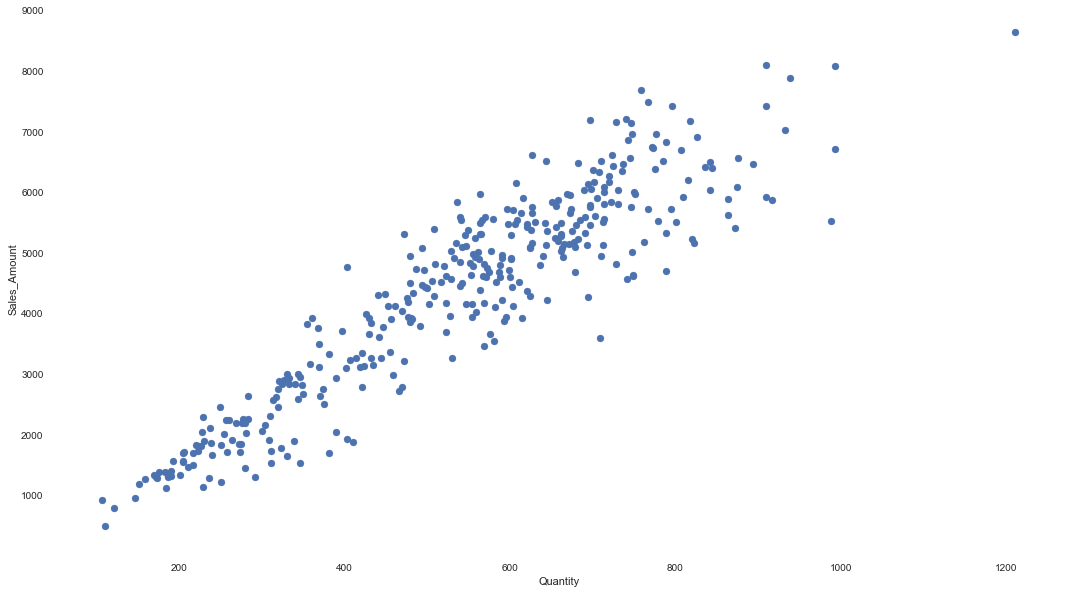

In [66]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(merged_count_sum['Quantity'], merged_count_sum['Sales_Amount'])
ax.set_xlabel('Quantity')
ax.set_ylabel('Sales_Amount')
plt.show()

In [67]:
clean_daily_merged = merged_count_sum.fillna(0)
clean_daily_merged

,SKU,Sales_Amount,Quantity
Date,,,
2017-01-02,243,1929,264
2017-01-03,111,798,121
2017-01-04,379,3273,530
2017-01-05,446,4919,590
2017-01-06,178,1559,205
...,...,...,...
2017-12-28,326,3720,397
2017-12-29,323,3363,421
2017-12-30,386,3940,614


### Distribution Plot

Distribution plots are very useful in checking how well a variable is distributed in a dataset. Here, the "distplot" function will be used to check the distributions of "Sales_Amount" and "Quantity" variables in the dataset.

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


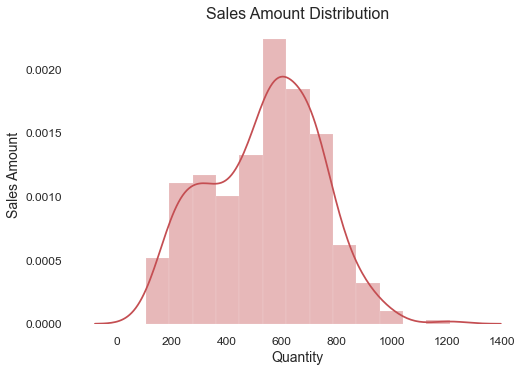

In [68]:
sb.distplot(clean_daily_merged['Quantity'], color = 'r')
plt.title('Sales Amount Distribution', fontsize = 16)
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Sales Amount', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')


/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


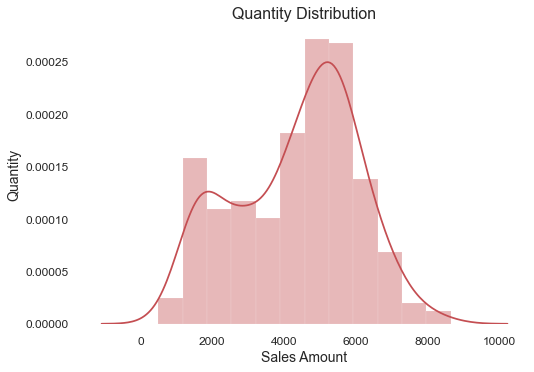

In [69]:
sb.distplot(clean_daily_merged['Sales_Amount'], color = 'r')
plt.title('Quantity Distribution', fontsize = 16)
plt.xlabel('Sales Amount', fontsize = 14)
plt.ylabel('Quantity', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')

In [70]:
merged_count_sum.head()

,SKU,Sales_Amount,Quantity
Date,,,
2017-01-02,243,1929,264
2017-01-03,111,798,121
2017-01-04,379,3273,530
2017-01-05,446,4919,590
2017-01-06,178,1559,205


# PREPROCESSING AND TRAINING

For this process, I will be calculating the daily percentage changes in "Quantity", "Sales_Amount" and "SKU" in order to answer questions like:

(1) What is the daily percentage change of Sales Amount, SKU(Products) and Quantity Sold?

(2) Is there an increase, decrease, or any kind of fluctuation?

(3) On what date was the highest number of product sold?

(4) What was the highest sale figure?

(5) What was the highest Sale Amount?

(6) What is the highest quantity sold

Also, the independent variable "X"  and the dependent variable "Y" will be defined. The data will then be split into a train set and a test set by using the "train_test_split" function of scikit-learn.

In [71]:
merged_count_sum['Daily_Quantity_%_Change'] = merged_count_sum['Quantity'].pct_change()
merged_count_sum

,SKU,Sales_Amount,Quantity,Daily_Quantity_%_Change
Date,,,,
2017-01-02,243,1929,264,NaN
2017-01-03,111,798,121,-0.541667
2017-01-04,379,3273,530,3.380165
2017-01-05,446,4919,590,0.113208
2017-01-06,178,1559,205,-0.652542
...,...,...,...,...
2017-12-28,326,3720,397,1.512658
2017-12-29,323,3363,421,0.060453
2017-12-30,386,3940,614,0.458432


In [72]:
merged_count_sum['SKU_Daily_Sales_Count_%_Change'] = merged_count_sum['SKU'].pct_change()
merged_count_sum

,SKU,Sales_Amount,Quantity,Daily_Quantity_%_Change,SKU_Daily_Sales_Count_%_Change
Date,,,,,
2017-01-02,243,1929,264,NaN,NaN
2017-01-03,111,798,121,-0.541667,-0.543210
2017-01-04,379,3273,530,3.380165,2.414414
2017-01-05,446,4919,590,0.113208,0.176781
2017-01-06,178,1559,205,-0.652542,-0.600897
...,...,...,...,...,...
2017-12-28,326,3720,397,1.512658,1.328571
2017-12-29,323,3363,421,0.060453,-0.009202
2017-12-30,386,3940,614,0.458432,0.195046


In [73]:
merged_count_sum['Daily_Sales_Amount_%_Change'] = merged_count_sum['Sales_Amount'].pct_change()
merged_count_sum

,SKU,Sales_Amount,Quantity,Daily_Quantity_%_Change,SKU_Daily_Sales_Count_%_Change,Daily_Sales_Amount_%_Change
Date,,,,,,
2017-01-02,243,1929,264,NaN,NaN,NaN
2017-01-03,111,798,121,-0.541667,-0.543210,-0.586314
2017-01-04,379,3273,530,3.380165,2.414414,3.101504
2017-01-05,446,4919,590,0.113208,0.176781,0.502903
2017-01-06,178,1559,205,-0.652542,-0.600897,-0.683066
...,...,...,...,...,...,...
2017-12-28,326,3720,397,1.512658,1.328571,1.919937
2017-12-29,323,3363,421,0.060453,-0.009202,-0.095968
2017-12-30,386,3940,614,0.458432,0.195046,0.171573


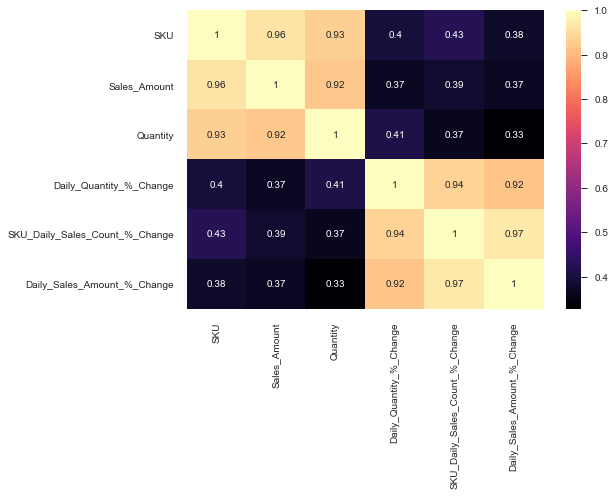

In [74]:
sb.heatmap(merged_count_sum.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

*Replacing NaN with 0*

In [75]:
clean_daily_merged = merged_count_sum.fillna(0)
clean_daily_merged

,SKU,Sales_Amount,Quantity,Daily_Quantity_%_Change,SKU_Daily_Sales_Count_%_Change,Daily_Sales_Amount_%_Change
Date,,,,,,
2017-01-02,243,1929,264,0.000000,0.000000,0.000000
2017-01-03,111,798,121,-0.541667,-0.543210,-0.586314
2017-01-04,379,3273,530,3.380165,2.414414,3.101504
2017-01-05,446,4919,590,0.113208,0.176781,0.502903
2017-01-06,178,1559,205,-0.652542,-0.600897,-0.683066
...,...,...,...,...,...,...
2017-12-28,326,3720,397,1.512658,1.328571,1.919937
2017-12-29,323,3363,421,0.060453,-0.009202,-0.095968
2017-12-30,386,3940,614,0.458432,0.195046,0.171573


In [76]:
merged_count_sum.value_counts()

SKU  Sales_Amount  Quantity  Daily_Quantity_%_Change  SKU_Daily_Sales_Count_%_Change  Daily_Sales_Amount_%_Change
638  7433          909       -0.084592                 0.052805                       -0.081098                      1
328  3955          477        0.174877                 0.064935                        0.222944                      1
329  3148          423        2.845455                 3.506849                        5.258449                      1
331  2801          421       -0.458172                -0.416226                       -0.598077                      1
     3998          426       -0.269297                -0.146907                       -0.115682                      1
                                                                                                                    ..
427  5498          661        2.046083                 1.385475                        2.631440                      1
     6089          874        0.612546               

In [77]:
merged_count_sum.SKU.sort_values(ascending=False).head()

Date
2017-09-24    638
2017-12-16    614
2017-09-23    606
2017-05-14    602
2017-12-17    594
Name: SKU, dtype: int64

In [78]:
merged_count_sum.Sales_Amount.sort_values(ascending=False).head()

Date
2017-12-17    8650
2017-03-19    8105
2017-09-23    8089
2017-05-14    7897
2017-12-23    7685
Name: Sales_Amount, dtype: int64

In [79]:
merged_count_sum.describe()

,SKU,Sales_Amount,Quantity,Daily_Quantity_%_Change,SKU_Daily_Sales_Count_%_Change,Daily_Sales_Amount_%_Change
count,363.000000,363.000000,363.000000,362.000000,362.000000,362.000000
mean,362.826446,4344.774105,536.716253,0.165991,0.120156,0.222759
std,115.045008,1713.739686,200.550759,0.726153,0.606961,0.922404
min,73.000000,503.000000,107.000000,-0.867410,-0.808429,-0.860954
25%,277.000000,2957.500000,374.500000,-0.273692,-0.273889,-0.341063
50%,386.000000,4683.000000,562.000000,-0.012042,-0.019225,-0.016721
75%,438.500000,5560.000000,686.500000,0.280961,0.181950,0.275582
max,638.000000,8650.000000,1211.000000,3.380165,3.506849,5.876428


<AxesSubplot:xlabel='Date'>

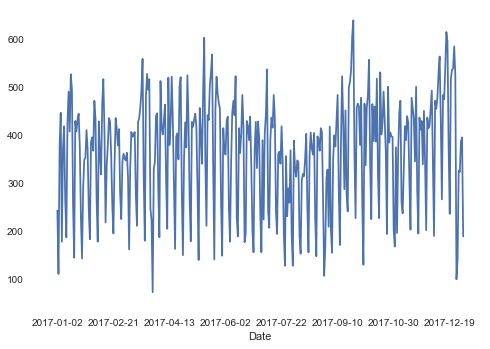

In [80]:
merged_count_sum['SKU'].plot()

<AxesSubplot:xlabel='Date'>

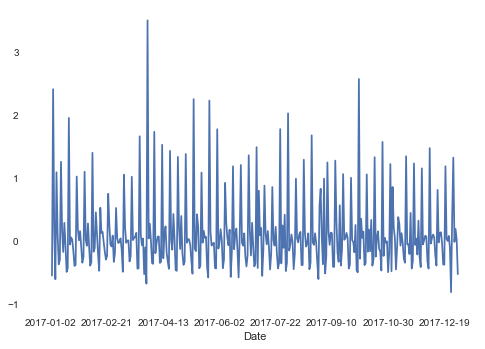

In [81]:
merged_count_sum['SKU_Daily_Sales_Count_%_Change'].plot()

<AxesSubplot:xlabel='Date'>

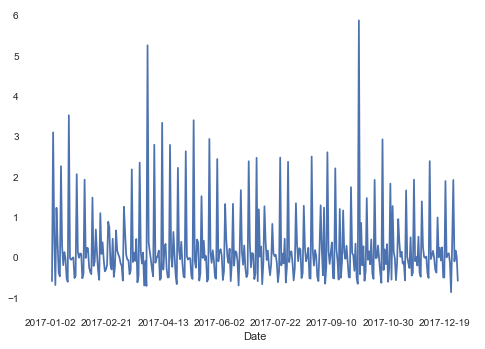

In [82]:
merged_count_sum['Daily_Sales_Amount_%_Change'].plot()

Checking the distribution of the ‘Sales_Amount’ variable in the dataset.

In [83]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


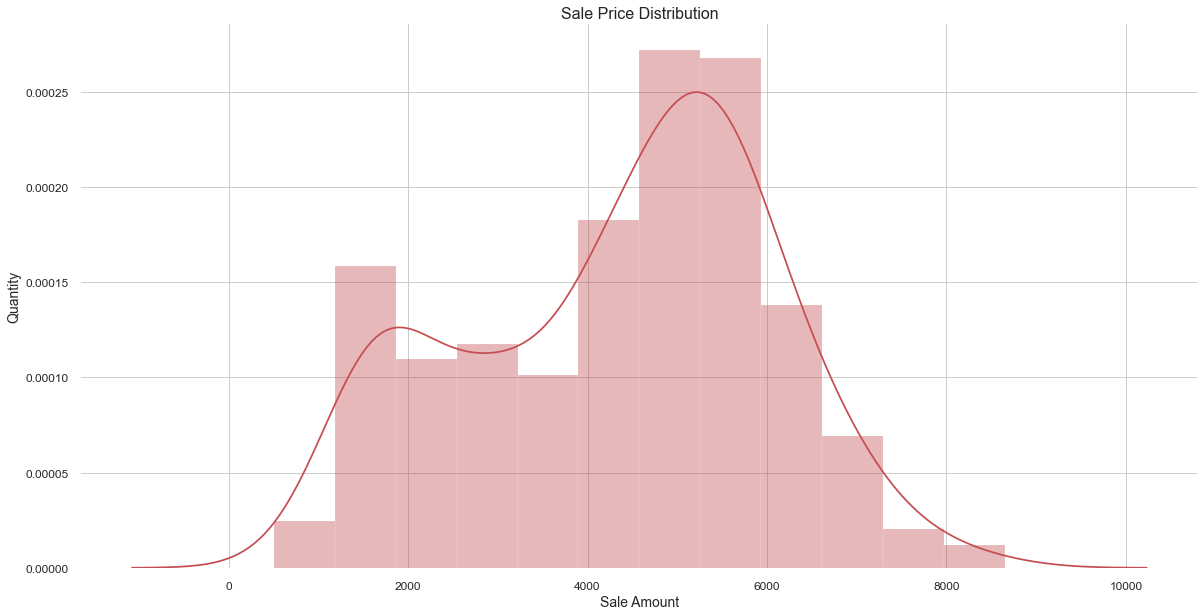

In [84]:
sb.distplot(clean_daily_merged['Sales_Amount'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Amount', fontsize = 14)
plt.ylabel('Quantity', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')


Checking the distribution of the ‘Quantity’ variable in the dataset.

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


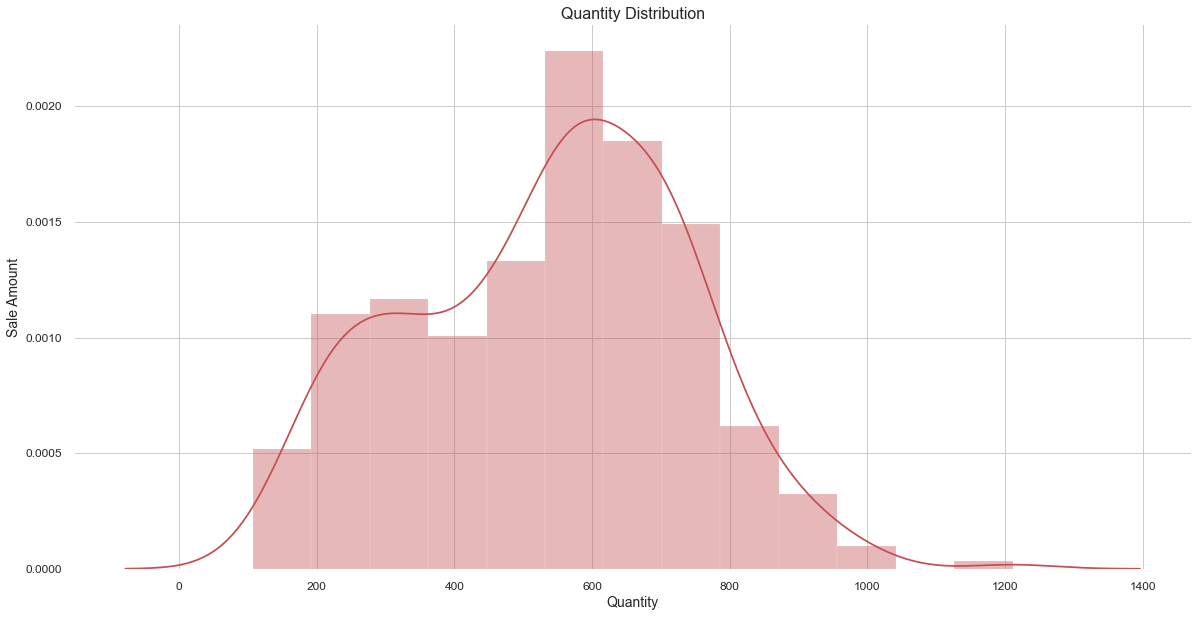

In [85]:
sb.distplot(clean_daily_merged['Quantity'], color = 'r')
plt.title('Quantity Distribution', fontsize = 16)
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Sale Amount', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')


Defining the variables and splitting the data...

In [86]:
# FEATURE SELECTION & DATA SPLIT

X_var = clean_daily_merged[['Quantity', 'SKU']].values
y_var = clean_daily_merged['Sales_Amount'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[444 314]
 [844 535]
 [809 426]
 [300 203]
 [205 180]]
X_test samples :  [[310 260]
 [588 365]
 [569 378]
 [575 410]
 [414 305]]
y_train samples :  [3271 6398 5934 2073 1703]
y_test samples :  [2321 4810 4186 4683 3274]


# MODELLING

To predict the sale prices and quantities of products(SKU), I will be using the following five linear regression algorithms through the scikit-learn package: Ordinal Least Square (OLS), Bayesian, Ridge, ElasticNet and Lasso. For further accuracy check, I will be adding the Random Forest model.

To evaluate the model, I will use the "variance_score" and the "r2_score" metric functions from scikit-learn package in python.
The variance score must be between 0.60 (60%) and 1 (100%), but not less for the model to be considered effective.

The "r2_score" (R-squared) metric, which is the most popular evaluation metric for regression models and is a measurement of how well the dependent variable(in this case, "Sales_Amount" for price prediction and "Quantity" for quantity prediction) explains the variance of the independent variable("Sales_Amount"/"Quantity" and "SKU"), must be greater than 0.60 (60%). In fact, it should be more than 0.70. 

The last thing I will be doing in this section is to evaluate the metric scores and conclude on which model is most suitable for this given case.

## Price Prediction

### Ordinary Least Square

In [87]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_y_pred = ols.predict(X_test)

In [88]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of OLS Model is {}'.format(evs(y_test, ols_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of OLS Model is {}'.format(r2(y_test, ols_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of OLS Model is {}:'.format(metrics.mean_absolute_error(y_test, ols_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of OLS Model is {}:'.format(metrics.mean_squared_error(y_test, ols_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of OLS Model is 0.9370104360619826
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of OLS Model is 0.9370101687315507
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of OLS Model is 311.93363693443973:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of OLS Model is 165678.6078590723:
-------------------------------------------------------------------------------


In [89]:
df=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':ols_y_pred})
df

,Actual Price,Predicted Price
0,2321,2775.128975
1,4810,4451.505526
2,4186,4574.742680
3,4683,4961.384262
4,3274,3469.675262
...,...,...
68,6965,6741.547148
69,5307,4666.514843
70,1837,1855.160896
71,4194,4109.717241


### Bayesian

In [90]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_y_pred = bayesian.predict(X_test)

In [91]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of Bayesian Model is {}'.format(evs(y_test, bayesian_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of Bayesian Model is {}'.format(r2(y_test, bayesian_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of Bayesian Model is {}:'.format(metrics.mean_absolute_error(y_test, bayesian_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of Bayesian Model is {}:'.format(metrics.mean_squared_error(y_test, bayesian_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of Bayesian Model is 0.9370605851048447
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of Bayesian Model is 0.9370603324814546
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of Bayesian Model is 312.0794566131088:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of Bayesian Model is 165546.66497112217:
-------------------------------------------------------------------------------


In [92]:
df=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':bayesian_y_pred})
df

,Actual Price,Predicted Price
0,2321,2774.001849
1,4810,4453.223470
2,4186,4574.860794
3,4683,4959.492662
4,3274,3469.214090
...,...,...
68,6965,6737.025019
69,5307,4664.989723
70,1837,1855.342174
71,4194,4108.317574


### Ridge

In [93]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

In [94]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of Ridge Model is {}'.format(evs(y_test, ridge_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of Ridge Model is {}'.format(r2(y_test, ridge_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of Ridge Model is {}:'.format(metrics.mean_absolute_error(y_test, ridge_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of Ridge Model is {}:'.format(metrics.mean_squared_error(y_test, ridge_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of Ridge Model is 0.9370104447757931
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of Ridge Model is 0.937010177447801
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of Ridge Model is 311.93366071551844:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of Ridge Model is 165678.58493320984:
-------------------------------------------------------------------------------


In [95]:
df=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':ridge_y_pred})
df

,Actual Price,Predicted Price
0,2321,2775.128791
1,4810,4451.505807
2,4186,4574.742700
3,4683,4961.383953
4,3274,3469.675187
...,...,...
68,6965,6741.546411
69,5307,4666.514594
70,1837,1855.160925
71,4194,4109.717013


### ElasticNet

In [96]:
elasticnet = ElasticNet(alpha = 0.01)
elasticnet.fit(X_train, y_train)
elasticnet_y_pred = elasticnet.predict(X_test)

In [97]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of ElasticNet Model is {}'.format(evs(y_test, elasticnet_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of ElasticNet Model is {}'.format(r2(y_test, elasticnet_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of ElasticNet Model is {}:'.format(metrics.mean_absolute_error(y_test, elasticnet_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of ElasticNet Model is {}:'.format(metrics.mean_squared_error(y_test, elasticnet_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of ElasticNet Model is 0.9370104647191442
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of ElasticNet Model is 0.9370101973973783
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of ElasticNet Model is 311.93371619059616:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of ElasticNet Model is 165678.53246095954:
-------------------------------------------------------------------------------


In [98]:
df=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':elasticnet_y_pred})
df

,Actual Price,Predicted Price
0,2321,2775.128331
1,4810,4451.506462
2,4186,4574.742749
3,4683,4961.383247
4,3274,3469.674994
...,...,...
68,6965,6741.544740
69,5307,4666.514021
70,1837,1855.160944
71,4194,4109.716476


### Lasso

In [99]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

In [100]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of Lasso Model is {}'.format(evs(y_test, lasso_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of Lasso Model is {}'.format(r2(y_test, lasso_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of Lasso Model is {}:'.format(metrics.mean_absolute_error(y_test, lasso_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of Lasso Model is {}:'.format(metrics.mean_squared_error(y_test, lasso_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of Lasso Model is 0.9370104427070303
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of Lasso Model is 0.937010175379676
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of Lasso Model is 311.9336570504819:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of Lasso Model is 165678.59037288255:
-------------------------------------------------------------------------------


In [101]:
df=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':lasso_y_pred})
df

,Actual Price,Predicted Price
0,2321,2775.128762
1,4810,4451.505766
2,4186,4574.742705
3,4683,4961.384024
4,3274,3469.675166
...,...,...
68,6965,6741.546615
69,5307,4666.514645
70,1837,1855.160828
71,4194,4109.717040


### Random Forest

In [102]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42) 
regressor.fit(X_train, y_train)
regressor_y_pred = regressor.predict(X_test)

In [103]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of Random Forest Model is {}'.format(evs(y_test, regressor_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of Random Forest Model is {}'.format(r2(y_test, regressor_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of Random Forest Model is {}:'.format(metrics.mean_absolute_error(y_test, regressor_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of Random Forest Model is {}:'.format(metrics.mean_squared_error(y_test, regressor_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of Random Forest Model is 0.9209671759851195
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of Random Forest Model is 0.9209373732114614
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of Random Forest Model is 341.49730508806255:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of Random Forest Model is 207953.97727263917:
-------------------------------------------------------------------------------


In [104]:
df=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':regressor_y_pred})
df

,Actual Price,Predicted Price
0,2321,2734.501
1,4810,4457.804
2,4186,4198.029
3,4683,4997.575
4,3274,3276.876
...,...,...
68,6965,7125.710
69,5307,4920.284
70,1837,1780.544
71,4194,4507.154


## Quantity Prediction

In [105]:
# FEATURE SELECTION & DATA SPLIT

X_var1 = clean_daily_merged[['Sales_Amount', 'SKU']].values
y_var1 = clean_daily_merged['Quantity'].values

X_train, X_test, y_train, y_test = train_test_split(X_var1, y_var1, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[3271  314]
 [6398  535]
 [5934  426]
 [2073  203]
 [1703  180]]
X_test samples :  [[2321  260]
 [4810  365]
 [4186  378]
 [4683  410]
 [3274  305]]
y_train samples :  [444 844 809 300 205]
y_test samples :  [310 588 569 575 414]


### Ordinary Least Square

In [106]:
ols1 = LinearRegression()
ols1.fit(X_train, y_train)
ols1_y_pred = ols1.predict(X_test)

In [107]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of OLS Model is {}'.format(evs(y_test, ols1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of OLS Model is {}'.format(r2(y_test, ols1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of OLS Model is {}:'.format(metrics.mean_absolute_error(y_test, ols1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of OLS Model is {}:'.format(metrics.mean_squared_error(y_test, ols1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')



VARIANCE SCORE:
Variance Score of OLS Model is 0.8661663000562451
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of OLS Model is 0.8661189761972553
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of OLS Model is 51.21466979949849:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of OLS Model is 4526.953953834338:
-------------------------------------------------------------------------------


In [108]:
df=pd.DataFrame({'Actual Quantity':y_test, 'Predicted Quantity':ols1_y_pred})
df

,Actual Quantity,Predicted Quantity
0,310,347.783090
1,588,556.059195
2,569,548.549652
3,575,602.681824
4,414,432.982491
...,...,...
68,747,829.711967
69,545,601.096438
70,220,255.461822
71,476,518.140023


### Bayesian

In [109]:
bayesian1 = BayesianRidge()
bayesian1.fit(X_train, y_train)
bayesian1_y_pred = bayesian1.predict(X_test)

In [110]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of Bayesian Model is {}'.format(evs(y_test, bayesian1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of Bayesian Model is {}'.format(r2(y_test, bayesian1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of Bayesian Model is {}:'.format(metrics.mean_absolute_error(y_test, bayesian1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of Bayesian Model is {}:'.format(metrics.mean_squared_error(y_test, bayesian1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of Bayesian Model is 0.8666313406726779
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of Bayesian Model is 0.866583959360456
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of Bayesian Model is 51.07842378796848:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of Bayesian Model is 4511.231356939506:
-------------------------------------------------------------------------------


In [111]:
df=pd.DataFrame({'Actual Quantity':y_test, 'Predicted Quantity':bayesian1_y_pred})
df

,Actual Quantity,Predicted Quantity
0,310,346.983849
1,588,556.877119
2,569,547.800612
3,575,601.929785
4,414,432.660742
...,...,...
68,747,829.505296
69,545,602.147665
70,220,255.694508
71,476,518.203667


### Ridge

In [112]:
ridge1 = Ridge(alpha = 0.5)
ridge1.fit(X_train, y_train)
ridge1_y_pred = ridge1.predict(X_test)

In [113]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of Ridge Model is {}'.format(evs(y_test, ridge1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of Ridge Model is {}'.format(r2(y_test, ridge1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of Ridge Model is {}:'.format(metrics.mean_absolute_error(y_test, ridge1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of Ridge Model is {}:'.format(metrics.mean_squared_error(y_test, ridge1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of Ridge Model is 0.866166331714664
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of Ridge Model is 0.8661190078519486
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of Ridge Model is 51.21466094885759:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of Ridge Model is 4526.952883485941:
-------------------------------------------------------------------------------


In [114]:
df=pd.DataFrame({'Actual Quantity':y_test, 'Predicted Quantity':ridge1_y_pred})
df

,Actual Quantity,Predicted Quantity
0,310,347.783038
1,588,556.059248
2,569,548.549604
3,575,602.681775
4,414,432.982470
...,...,...
68,747,829.711954
69,545,601.096507
70,220,255.461837
71,476,518.140027


### ElasticNet

In [115]:
elasticnet1 = ElasticNet(alpha = 0.01)
elasticnet1.fit(X_train, y_train)
elasticnet1_y_pred = elasticnet1.predict(X_test)

In [116]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of ElasticNet Model is {}'.format(evs(y_test, elasticnet1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of ElasticNet Model is {}'.format(r2(y_test, elasticnet1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of ElasticNet Model is {}:'.format(metrics.mean_absolute_error(y_test, elasticnet1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of ElasticNet Model is {}:'.format(metrics.mean_squared_error(y_test, elasticnet1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of ElasticNet Model is 0.8661664762843796
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of ElasticNet Model is 0.8661191524101615
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of ElasticNet Model is 51.21461989995707:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of ElasticNet Model is 4526.947995501413:
-------------------------------------------------------------------------------


In [117]:
df=pd.DataFrame({'Actual Quantity':y_test, 'Predicted Quantity':elasticnet1_y_pred})
df

,Actual Quantity,Predicted Quantity
0,310,347.782795
1,588,556.059494
2,569,548.549378
3,575,602.681550
4,414,432.982371
...,...,...
68,747,829.711896
69,545,601.096824
70,220,255.461903
71,476,518.140046


### Lasso

In [118]:
lasso1 = Lasso(alpha = 0.01)
lasso1.fit(X_train, y_train)
lasso1_y_pred = lasso1.predict(X_test)

In [119]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of Lasso Model is {}'.format(evs(y_test, lasso1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of Lasso Model is {}'.format(r2(y_test, lasso1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of Lasso Model is {}:'.format(metrics.mean_absolute_error(y_test, lasso1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of Lasso Model is {}:'.format(metrics.mean_squared_error(y_test, lasso1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of Lasso Model is 0.8661664691742923
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of Lasso Model is 0.8661191453068366
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of Lasso Model is 51.21462120877315:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of Lasso Model is 4526.948235687986:
-------------------------------------------------------------------------------


In [120]:
df=pd.DataFrame({'Actual Quantity':y_test, 'Predicted Quantity':lasso1_y_pred})
df

,Actual Quantity,Predicted Quantity
0,310,347.782800
1,588,556.059486
2,569,548.549386
3,575,602.681559
4,414,432.982373
...,...,...
68,747,829.711903
69,545,601.096814
70,220,255.461896
71,476,518.140045


### Random Forest

In [121]:
regressor1 = RandomForestRegressor(n_estimators = 1000, random_state = 42) 
regressor1.fit(X_train, y_train)
regressor1_y_pred = regressor1.predict(X_test)

In [122]:
print(cl('VARIANCE SCORE:', attrs = ['bold']))
print(cl('Variance Score of Random Forest Model is {}'.format(evs(y_test, regressor1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of Random Forest Model is {}'.format(r2(y_test, regressor1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN ABSOLUTE ERROR:', attrs = ['bold']))
print(cl('Mean Absolute Error of Random Forest Model is {}:'.format(metrics.mean_absolute_error(y_test, regressor1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('MEAN SQUARED ERROR:', attrs = ['bold']))
print(cl('Mean Squared Error of Random Forest Model is {}:'.format(metrics.mean_squared_error(y_test, regressor1_y_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


VARIANCE SCORE:
Variance Score of Random Forest Model is 0.8695849664578115
-------------------------------------------------------------------------------
R-SQUARED:
R-Squared of Random Forest Model is 0.8695840252417956
-------------------------------------------------------------------------------
MEAN ABSOLUTE ERROR:
Mean Absolute Error of Random Forest Model is 50.138397260273976:
-------------------------------------------------------------------------------
MEAN SQUARED ERROR:
Mean Squared Error of Random Forest Model is 4409.789347328766:
-------------------------------------------------------------------------------


In [123]:
df=pd.DataFrame({'Actual Quantity':y_test, 'Predicted Quantity':regressor1_y_pred})
df

,Actual Quantity,Predicted Quantity
0,310,341.772
1,588,535.530
2,569,565.993
3,575,569.007
4,414,435.188
...,...,...
68,747,812.701
69,545,587.913
70,220,231.626
71,476,522.831


In [124]:
                            # Price                              # Quantity
    
                # R-Squared          # Variance           ~ # R-Squared         # Variance
        
# OLS:           0.93701017          0.93701044             0.86611898          0.86616630
# Bayesian:      0.93706033          0.93706059             0.86658396          0.86663134
# Ridge:         0.93701018          0.93701045             0.86611901          0.86616633
# ElasticNet:    0.93701020          0.93701047             0.86611915          0.86616648
# Lasso:         0.93701018          0.93701044             0.86611915          0.86616647
# Random Forest: 0.92093737          0.92096718             0.86958403          0.86958497

It can be seen that rounding the output values of every model will give Variance and R-Squared scores of either 0.92 (92%) or 0.94 (94%) for predicting sales prices of products, and Variance and R-Squared scores of 0.87 (87%) for predicting quantity of products that will be sold based on products prices. This suggests that the models perform  well on the dataset.

Comparing all the evaluation metrics from the models, Bayesian regression algorithm is the most suitable model for predicting products prices on the basis of both Variance Score and R-Squared. The worst performing model on both evaluation metrics for price prediction, however, is the Random Rorest model.

In contrast, Random Forest model is the best performing model for sales quantity prediction on the basis of both Variance Score and R-Squared and the worst performing model on both basis is the Ordinary Least Square model (OLS)

After evaluation, it can be concluded that the Bayesian regression model and the Random Forest should be used for the price and sales quantity predictions respectively in this case.

In [125]:
predict = "Sales_Amount"
data = clean_daily_merged[['Sales_Amount', 'Quantity', 'SKU']]
X = np.array(clean_daily_merged.drop([predict], 1))
y = np.array(clean_daily_merged[predict])

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)

from sklearn.metrics import mean_absolute_error
model.score(Xtest, predictions)

1.0

In [126]:
predict = "Quantity"
data = clean_daily_merged[['Sales_Amount', 'Quantity', 'SKU']]
X = np.array(clean_daily_merged.drop([predict], 1))
y = np.array(clean_daily_merged[predict])

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)

from sklearn.metrics import mean_absolute_error
model.score(Xtest, predictions)

1.0

In [127]:
merged_count_sum = merged_count_sum.dropna()

In [128]:
len(scanner_data) * .7, len(scanner_data) * .3

(92194.2, 39511.799999999996)

In [129]:
y = merged_count_sum['Daily_Quantity_%_Change']
X = merged_count_sum[['Daily_Sales_Amount_%_Change', 'SKU_Daily_Sales_Count_%_Change']]

In [130]:
len(X), len(y)

(362, 362)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)


In [132]:
X_train.shape, X_test.shape

((289, 2), (73, 2))

In [133]:
y_train.shape, y_test.shape

((289,), (73,))

In [134]:
X_train.isnull().sum().sum()


0

In [135]:
merged_count_sum.head()

,SKU,Sales_Amount,Quantity,Daily_Quantity_%_Change,SKU_Daily_Sales_Count_%_Change,Daily_Sales_Amount_%_Change
Date,,,,,,
2017-01-03,111,798,121,-0.541667,-0.543210,-0.586314
2017-01-04,379,3273,530,3.380165,2.414414,3.101504
2017-01-05,446,4919,590,0.113208,0.176781,0.502903
2017-01-06,178,1559,205,-0.652542,-0.600897,-0.683066
2017-01-07,373,3477,569,1.775610,1.095506,1.230276


## Linear Regression

### Quantity's Percentage Change

In [136]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate the model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

(0.8713328443539824, 0.20260041580787805, 0.3048350773209818)

In [137]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Ordinary Least Square

In [138]:
result = ols("y ~ X['Daily_Sales_Amount_%_Change'] + X['SKU_Daily_Sales_Count_%_Change']", data=X).fit()
display( result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1330.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          1.00e-166
Time:                        18:12:18   Log-Likelihood:                -11.896
No. Observations:                 362   AIC:                             29.79
Df Residuals:                     359   BIC:                             41.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0263      0.014      1.914      0.056      -0.001       0.053
X['Daily_Sales_Amount_%_Change']        0.1070      0.060      1.797      0.073      -0.010       0.224
X['SKU_Daily_Sales_Count_%_Change']     0.9645      0.090     10.659      0.000       0.787       1.142
==============================================================================
Omnibus:                       51.920   Durbin-Watson:                   2.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              414.110
Skew:                          -0.210   Prob(JB):                     1.19e-90
Kurtosis:                       8.223   Cond. No.                         9.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#y = 0.0272 + 0.1210 * (Daily_Sales_Amount_%_Change) + 0.9361 * (SKU_Daily_Sales_Count_%_Change)

result = ols("y ~ X['SKU_Daily_Sales_Count_%_Change']", data=X).fit()


y_1 = 0.0327 + 1.1145(SKU_daily_sales_count_%_change)

### Actual Quantity

In [140]:
b = merged_count_sum['Quantity']
a = merged_count_sum[['Sales_Amount', 'SKU']]

In [141]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test=train_test_split(a,b, test_size=0.2, random_state=42)


In [142]:
lr = LinearRegression()
#Fit a and b 
lr.fit(a_train, b_train)
bpred = lr.predict(a_test)
#Metrics to evaluate the model 
r2_score(b_test, bpred), mean_absolute_error(b_test, bpred), np.sqrt(mean_squared_error(b_test, bpred))

(0.839837110975826, 58.28965595344107, 78.81690492843074)

In [143]:
result_1 = ols("b ~ a['Sales_Amount'] + a['SKU']", data=a).fit()
display( result_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1314.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          6.77e-166
Time:                        18:12:18   Log-Likelihood:                -2048.2
No. Observations:                 362   AIC:                             4102.
Df Residuals:                     359   BIC:                             4114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -21.2113     13.824     -1.534      0.126     -48.397       5.974
a['Sales_Amount']     0.0377      0.008      4.816      0.000       0.022       0.053
a['SKU']              1.0866      0.116      9.328      0.000       0.858       1.316
==============================================================================
Omnibus:                       91.953   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.972
Skew:                           1.279   Prob(JB):                     1.88e-45
Kurtosis:                       5.666   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
#b = -16.4572 + 0.0371 * (Sales_Amount) + 1.0860 * (SKU)

### Sales Amount's Percentage Change

In [145]:
q = merged_count_sum['Daily_Sales_Amount_%_Change']
p = merged_count_sum[['Daily_Quantity_%_Change', 'SKU_Daily_Sales_Count_%_Change']]

In [146]:
from sklearn.model_selection import train_test_split
p_train, p_test, q_train, q_test=train_test_split(p,q, test_size=0.2, random_state=42)


In [147]:
lr = LinearRegression()
#Fit p and q 
lr.fit(p_train, q_train)
qpred = lr.predict(p_test)
#Metrics to evaluate the model 
r2_score(q_test, qpred), mean_absolute_error(q_test, qpred), np.sqrt(mean_squared_error(q_test, qpred))

(0.9659399809432754, 0.12167349894716899, 0.18166555303624876)

In [148]:
Sales_Amount_result = ols("q ~ p['Daily_Quantity_%_Change'] + p['SKU_Daily_Sales_Count_%_Change']", data=p).fit()
display( Sales_Amount_result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2948.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          1.62e-223
Time:                        18:12:18   Log-Likelihood:                 33.367
No. Observations:                 362   AIC:                            -60.73
Df Residuals:                     359   BIC:                            -49.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0429      0.012      3.589      0.000       0.019       0.066
p['Daily_Quantity_%_Change']            0.0833      0.046      1.797      0.073      -0.008       0.175
p['SKU_Daily_Sales_Count_%_Change']     1.3815      0.055     24.905      0.000       1.272       1.491
==============================================================================
Omnibus:                      236.707   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6299.699
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      22.929   Cond. No.                         6.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
#q = 0.0428 + 0.0840 * (Daily_Quantity_%_Change) + 1.3805 * (SKU_Daily_Sales_Count_%_Change)

### Actual Sales Amount 

In [150]:
n = merged_count_sum['Sales_Amount']
m = merged_count_sum[['Quantity', 'SKU']]

In [151]:
from sklearn.model_selection import train_test_split
m_train, m_test, n_train, n_test=train_test_split(m,n, test_size=0.2, random_state=42)


In [152]:
lr = LinearRegression()
#Fit m and n 
lr.fit(m_train, n_train)
npred = lr.predict(m_test)
#Metrics to evaluate the model 
r2_score(n_test, npred), mean_absolute_error(n_test, npred), np.sqrt(mean_squared_error(n_test, npred))

(0.9419732360334471, 321.49303074281954, 399.12875406543765)

In [153]:
Sales_Amount_result_1 = ols("n ~ m['Quantity'] + m['SKU']", data=m).fit()
display( Sales_Amount_result_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2375.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          1.01e-207
Time:                        18:12:18   Log-Likelihood:                -2727.7
No. Observations:                 362   AIC:                             5461.
Df Residuals:                     359   BIC:                             5473.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -759.9764     81.246     -9.354      0.000    -919.754    -600.199
m['Quantity']     1.6093      0.334      4.816      0.000       0.952       2.267
m['SKU']         11.6931      0.582     20.093      0.000      10.549      12.838
==============================================================================
Omnibus:                        2.471   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.200
Skew:                           0.154   Prob(JB):                        0.333
Kurtosis:                       3.225   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
#n = -779.0672 + 1.3639 * (Quantity) + 12.1074 * (SKU)

## Random Forest

### Quantity's Percentage Change

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
d = merged_count_sum['Daily_Quantity_%_Change']
c = merged_count_sum[['Daily_Sales_Amount_%_Change', 'SKU_Daily_Sales_Count_%_Change']]

In [157]:
from sklearn.model_selection import train_test_split
c_train, c_test, d_train, d_test=train_test_split(c,d, test_size=0.2, random_state=42)

In [158]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(c_train, d_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [159]:
d_pred = regressor.predict(c_test)

In [160]:
df=pd.DataFrame({'Actual':d_test, 'Predicted':d_pred})
df

,Actual,Predicted
Date,,
2017-06-16,0.397638,0.121357
2017-02-05,-0.083851,-0.108187
2017-01-18,2.391304,2.088603
2017-11-22,2.517857,1.317707
2017-03-01,0.610108,0.266097
...,...,...
2017-10-28,-0.001802,-0.086048
2017-03-26,-0.430556,-0.648473
2017-04-08,0.157116,0.007528


In [161]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(d_test, d_pred))
print('Mean Squared Error:', metrics.mean_squared_error(d_test, d_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(d_test, d_pred)))

Mean Absolute Error: 0.21127819021636124
Mean Squared Error: 0.1057981518529622
Root Mean Squared Error: 0.32526627838274624


In [162]:
# Calculate the absolute errors
errors = abs(d_pred - d_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / d_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.21 degrees.
Accuracy: 119.74 %.


/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


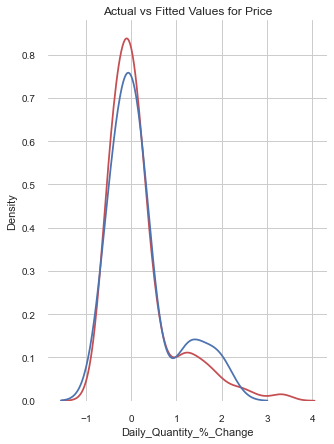

In [163]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(d, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

### Actual Quantity

In [164]:
f = merged_count_sum['Quantity']
e = merged_count_sum[['Sales_Amount', 'SKU']]

In [165]:
from sklearn.model_selection import train_test_split
e_train, e_test, f_train, f_test=train_test_split(e,f, test_size=0.2, random_state=42)

In [166]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(e_train, f_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [167]:
f_pred = regressor.predict(e_test)

In [168]:
df_1=pd.DataFrame({'Actual':f_test, 'Predicted':f_pred})
df_1

,Actual,Predicted
Date,,
2017-06-16,710,609.651
2017-02-05,590,582.328
2017-01-18,624,605.997
2017-11-22,788,648.119
2017-03-01,446,493.103
...,...,...
2017-10-28,554,538.607
2017-03-26,410,289.887
2017-04-08,626,661.306


In [169]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(f_test, f_pred))
print('Mean Squared Error:', metrics.mean_squared_error(f_test, f_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(f_test, f_pred)))

Mean Absolute Error: 60.743410958904114
Mean Squared Error: 7356.863232863015
Root Mean Squared Error: 85.77215884459837


In [170]:
# Calculate the absolute errors
errors = abs(f_pred - f_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / f_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 60.74 degrees.
Accuracy: 88.94 %.


/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


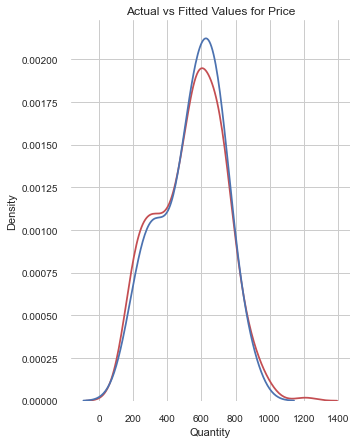

In [171]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(f, hist=False, color="r", label="Actual Value")
sns.distplot(f_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

### Sales Amount's Percentage Change

In [172]:
h = merged_count_sum['Daily_Sales_Amount_%_Change']
g = merged_count_sum[['Daily_Quantity_%_Change', 'SKU_Daily_Sales_Count_%_Change']]

In [173]:
from sklearn.model_selection import train_test_split
g_train, g_test, h_train, h_test=train_test_split(g,h, test_size=0.2, random_state=42)

In [174]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(g_train, h_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [175]:
h_pred = regressor.predict(g_test)

In [176]:
gh_df=pd.DataFrame({'Actual':h_test, 'Predicted':h_pred})
gh_df

,Actual,Predicted
Date,,
2017-06-16,0.152629,0.243614
2017-02-05,-0.238781,-0.051444
2017-01-18,3.525288,2.423631
2017-11-22,1.929786,2.011898
2017-03-01,0.668574,0.622556
...,...,...
2017-10-28,-0.166800,-0.026223
2017-03-26,-0.695138,-0.589815
2017-04-08,0.038226,0.051221


In [177]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(h_test, h_pred))
print('Mean Squared Error:', metrics.mean_squared_error(h_test, h_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(h_test, h_pred)))

Mean Absolute Error: 0.149638971008433
Mean Squared Error: 0.0640468121055832
Root Mean Squared Error: 0.25307471644868673


In [178]:
# Calculate the absolute errors
errors = abs(h_pred - h_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / h_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.15 degrees.
Accuracy: 110.75 %.


/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


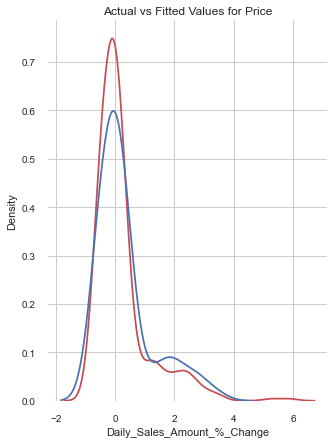

In [179]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(h, hist=False, color="r", label="Actual Value")
sns.distplot(h_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

### Actual Sales Amount

In [180]:
j = merged_count_sum['Sales_Amount']
i = merged_count_sum[['Quantity', 'SKU']]

In [181]:
from sklearn.model_selection import train_test_split
i_train, i_test, j_train, j_test=train_test_split(i,j, test_size=0.2, random_state=42)

In [182]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(i_train, j_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [183]:
j_pred = regressor.predict(i_test)

In [184]:
ij_df=pd.DataFrame({'Actual':j_test, 'Predicted':j_pred})
ij_df

,Actual,Predicted
Date,,
2017-06-16,4954,5334.350000
2017-02-05,4970,4977.380000
2017-01-18,5100,5377.539533
2017-11-22,5341,6058.568000
2017-03-01,3791,3884.794000
...,...,...
2017-10-28,4161,5146.612000
2017-03-26,1881,2959.409000
2017-04-08,5758,5383.369033


In [185]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(j_test, j_pred))
print('Mean Squared Error:', metrics.mean_squared_error(j_test, j_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(j_test, j_pred)))

Mean Absolute Error: 385.07724168297455
Mean Squared Error: 247357.14248491052
Root Mean Squared Error: 497.35012062420424


In [186]:
# Calculate the absolute errors
errors = abs(j_pred - j_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / j_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 385.08 degrees.
Accuracy: 90.67 %.


/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


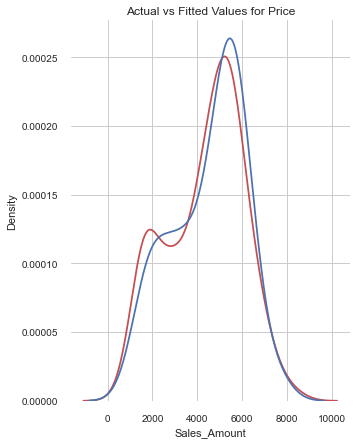

In [187]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(j, hist=False, color="r", label="Actual Value")
sns.distplot(j_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [188]:
#OLS: Quantity = 84%, Price = 0.936492
#Bay Price = 0.936573
#Ridge Price = 0.936492

#RF: Quantity = 88%, Price = 91%.........

In [189]:
clean_daily_merged

,SKU,Sales_Amount,Quantity,Daily_Quantity_%_Change,SKU_Daily_Sales_Count_%_Change,Daily_Sales_Amount_%_Change
Date,,,,,,
2017-01-02,243,1929,264,0.000000,0.000000,0.000000
2017-01-03,111,798,121,-0.541667,-0.543210,-0.586314
2017-01-04,379,3273,530,3.380165,2.414414,3.101504
2017-01-05,446,4919,590,0.113208,0.176781,0.502903
2017-01-06,178,1559,205,-0.652542,-0.600897,-0.683066
...,...,...,...,...,...,...
2017-12-28,326,3720,397,1.512658,1.328571,1.919937
2017-12-29,323,3363,421,0.060453,-0.009202,-0.095968
2017-12-30,386,3940,614,0.458432,0.195046,0.171573


In [190]:
predict = "Sales_Amount"
data = data[['Sales_Amount', 'Quantity', 'SKU']]
X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)

from sklearn.metrics import mean_absolute_error
model.score(Xtest, predictions)

1.0